Need to install nptdms. Command: conda install -c conda-forge nptdms

In [138]:
import pandas as pd
from nptdms import TdmsFile
import os
from datetime import datetime
import numpy as np

In [2]:
import matplotlib.pyplot as plt

Data for temperature and humidity. This comes from Pai's DSC google drive. According to Pai, he only backed up temperature and humidity data until 6 months ago. So we still need to figure out how to extract data from DSC. <br>Link to Pai's DSC folder: https://drive.google.com/drive/folders/0BxuhdUf7uaUYcTVhVzhJeDZEMG8?usp=sharing
<br> Below I use 2017-08-28.txt in /MFP3D/MFP3D_Temperature to test how to read .txt file

In [5]:
folder = './MFP3D_Hum'

In [7]:
files = os.listdir(folder)

In [20]:
files

['2016-03-19.txt',
 '2016-04-18.txt',
 '2016-05-18.txt',
 '2016-06-16.txt',
 '2017-08-28.txt',
 '2019-06-12.txt']

In [19]:
time_test = os.path.getmtime('/'.join([folder, files[0]]))

datetime.utcfromtimestamp(time_test).strftime('%Y-%m-%d %H:%M:%S')

'2020-03-01 04:52:00'

In [15]:
os.path.getctime('/'.join([folder, files[0]]))

1583038304.568966

In [7]:
path = folder + '/2017-08-28.txt'

In [10]:
data = pd.read_csv(path, sep="\t", header = None)

In [25]:
data[['date','time']] = data[0].str.split(expand=True)
data.drop(0, axis=1, inplace=True)

In [27]:
data.rename(columns = {1: 'time_labview',
             2: 'Temp'}, inplace = True)

reformatting date and time columns. More processing steps needed

In [28]:
data.head()

,time_labview,Temp,date,time
0,3.586785e+09,33.17,2017-08-28,13:16:09.2870
1,3.588536e+09,36.95,2017-09-17,19:28:53.8380
2,3.588536e+09,36.95,2017-09-17,19:28:54.8380
3,3.588536e+09,36.95,2017-09-17,19:28:55.8470
4,3.588536e+09,36.95,2017-09-17,19:28:56.8370
5,3.588536e+09,36.95,2017-09-17,19:28:57.8770
6,3.588536e+09,36.95,2017-09-17,19:28:58.8570
7,3.588536e+09,36.95,2017-09-17,19:28:59.8170
8,3.588536e+09,36.95,2017-09-17,19:29:00.8370
9,3.588536e+09,36.95,2017-09-17,19:29:01.8870


Data for device writing log files containing 2T conductance or current 

.Dat file

.tdms file

Create a simple pipeline

In [84]:
def read_tdms(path, file):
    file = '/'.join([path,file])
    tdms_file_test = TdmsFile(file)
    
    time = tdms_file_test.object('contact data', 'time')
    time_data = time.data
    
    G_2t = tdms_file_test.object('conductance data', '2tG')
    G_2t_data = G_2t.data
    
    G_4t = tdms_file_test.object('conductance data', '4tG')
    G_4t_data = G_4t.data
    
    return time_data, G_2t_data, G_4t_data

In [ ]:
def get_writing(time_data, G2t_data)

In [ ]:
class Pulsed_writing_process_Extractor:

    
    def get_endtime():

        return time, index, G2t

    def get_second_min():

        return time, index, G2t

    def get_first_min():

        return time, index, G2t

    def get_middle_peak():

        return time, index, G2t

    def get_start_time():

        return time, index, G2t
    
    def get_data():
        
        return time_arr, G2t_arr

In [170]:
i = len(G2t_data_writing) - 1 
time_get = []
G2t_get = []

time_start_record_1 = 0
time_start_record_2 = 0
end_found = False

second_minimum = 100
second_minimum_time = -1
second_minimum_found = False

peak_found = False
peak = 0
peak_time = 0

first_minimum = 100
first_minimum_time = -1
first_minimum_found = False

time_end_record_1 = 0
time_end_record_2 = 0
G2t_start_1 = 0
G2t_start_2 = 0
start_found = False
while i >= 0:
    
    G2t = G2t_data_writing[i]
    time = time_data_writing[i]
    
    if end_found == False:
        if G2t < 10 ** (-8):
            time_start_record_1 = 0.
            time_start_record_2 = 0.
        else:
            if time_start_record_1 == 0.:
                time_start_record_1 = time
            time_start_record_2 = time
            if (time_start_record_1 - time_start_record_2) >= 3:
                end_found = True
        #print(f"{time_start_record_1} and {time_start_record_2}")
    elif second_minimum_found == False:
        
        if (G2t < second_minimum)|(np.abs(G2t - second_minimum) < 1.5*10**(-9)):
            second_minimum = G2t
            second_minimum_time = time
        else:
            if (second_minimum_time - time) >= 3:
                second_minimum_found = True
                
    elif peak_found == False:
        
        if (G2t > peak)|(np.abs(G2t - peak) < 1.5*10**(-9)):
            peak = G2t
            peak_time = time
        else:
            if (peak_time - time) >= 2:
                peak_found = True
            
    elif first_minimum_found == False:
        
        if (G2t < first_minimum)|(np.abs(G2t - first_minimum) < 1.5*10**(-9)):
            first_minimum = G2t
            first_minimum_time = time
        else:
            if (first_minimum_time - time) >= 3:
                first_minimum_found = True
        
    elif start_found == False:
        
        if (G2t - G2t_start_1) > 1.5*10**(-9):
            G2t_start_1 = G2t
            time_end_record_1 = time
        else:
            if (time_end_record_1 - time) >= 3:
                start_found = True
        
    else:
        break
        
    i -= 1

In [85]:
folder_tdms = './tdms/20160531/20160531'
files_tdms = os.listdir(folder_tdms)
files_tdms = [file for file in files_tdms if not ('index' in file)]

In [86]:
tip_V_lst = []
time_data_lst = []
G2t_data_lst = []
G4t_data_lst = []
for i in range(len(files_tdms)):
    time_data, G_2t_data, G_4t_data = read_tdms(folder_tdms,files_tdms[i])
    time_data_lst.append(time_data)
    G2t_data_lst.append(G_2t_data)
    G4t_data_lst.append(G_4t_data)

In [ ]:
fig, axs = plt.subplots(len(files_tdms))
fig.suptitle('Tip voltage data')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(files_tdms)):
    axs[i].plot(time_data_lst[i], tip_V_lst[i])

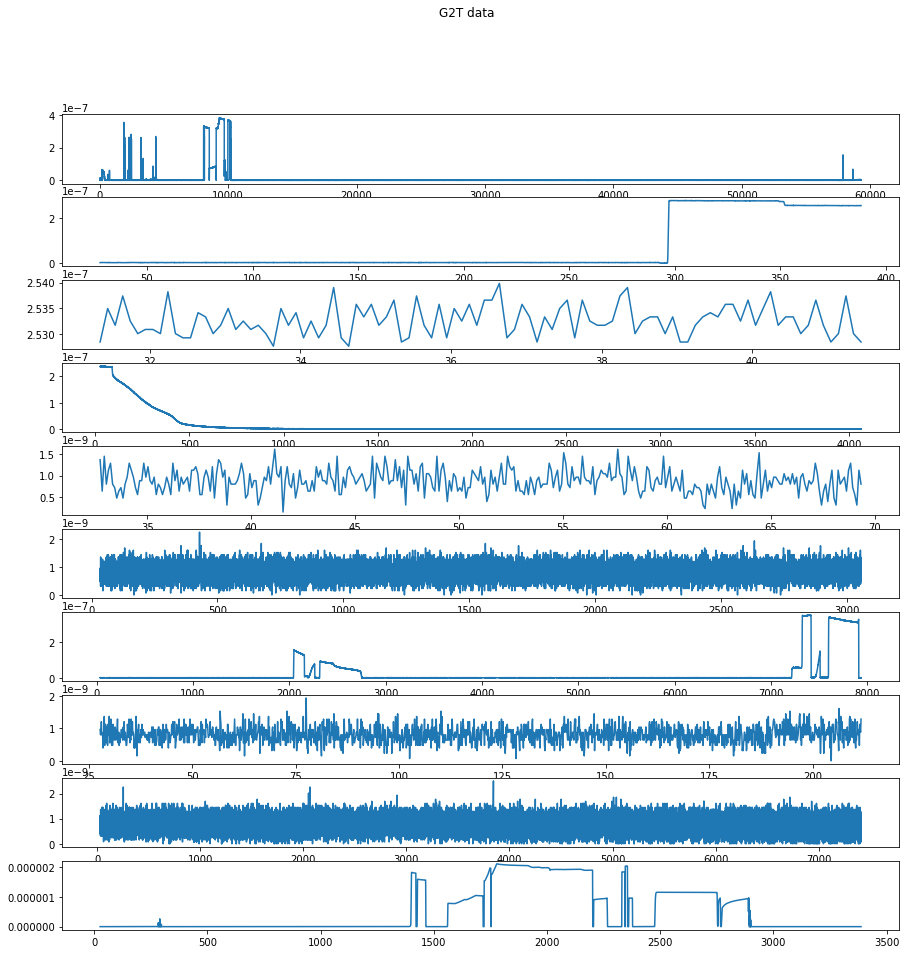

In [88]:
fig, axs = plt.subplots(len(files_tdms))
fig.suptitle('G2T data')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(files_tdms)):
    axs[i].plot(time_data_lst[i], G2t_data_lst[i])

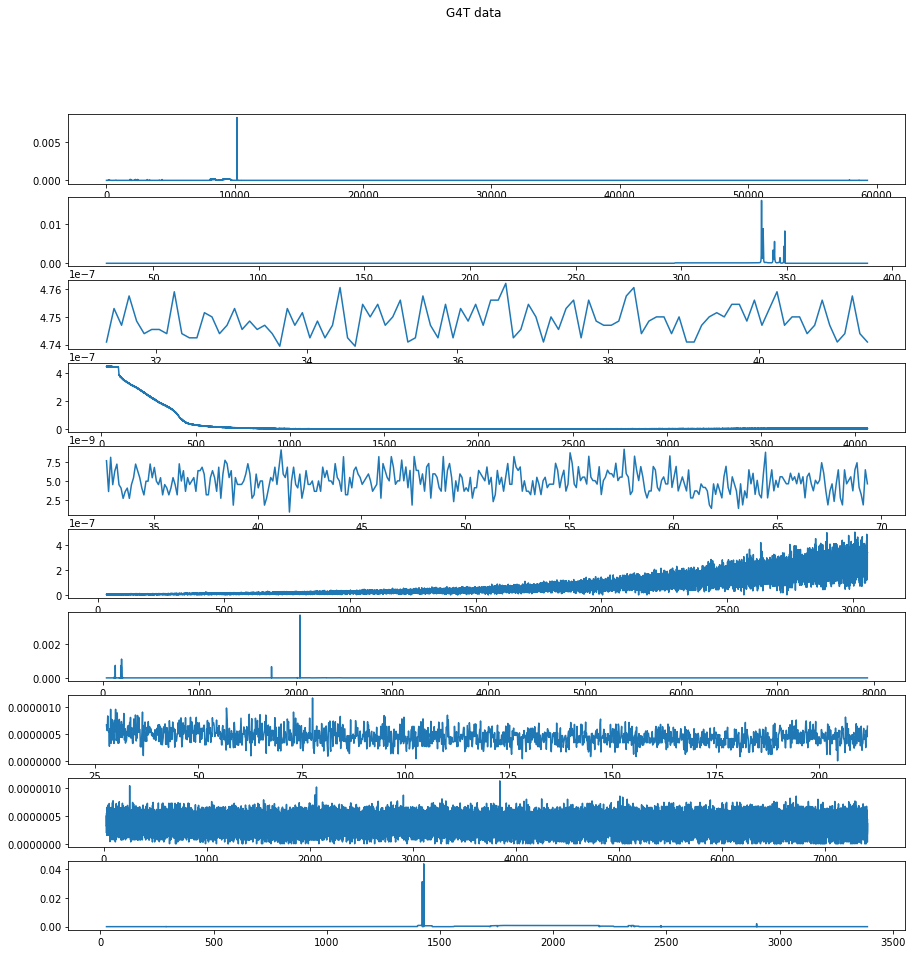

In [89]:
fig, axs = plt.subplots(len(files_tdms))
fig.suptitle('G4T data')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(files_tdms)):
    axs[i].plot(time_data_lst[i], G4t_data_lst[i])

In [90]:
folder_tdms = './tdms/20160429'
files_tdms = os.listdir(folder_tdms)
files_tdms = [file for file in files_tdms if not ('index' in file)]

In [92]:
#files_tdms

In [93]:
tip_V_lst_1 = []
time_data_lst_1 = []
G2t_data_lst_1 = []
G4t_data_lst_1 = []
for i in range(len(files_tdms)):
    time_data, tip_V_data, G_2t_data, G_4t_data = read_tdms(folder_tdms,files_tdms[i])
    time_data_lst_1.append(time_data)
    tip_V_lst_1.append(tip_V_data)
    G2t_data_lst_1.append(G_2t_data)
    G4t_data_lst_1.append(G_4t_data)

In [ ]:
fig, axs = plt.subplots(len(files_tdms))
fig.suptitle('Tip voltage data')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(files_tdms)):
    axs[i].plot(time_data_lst_1[i], tip_V_lst_1[i])

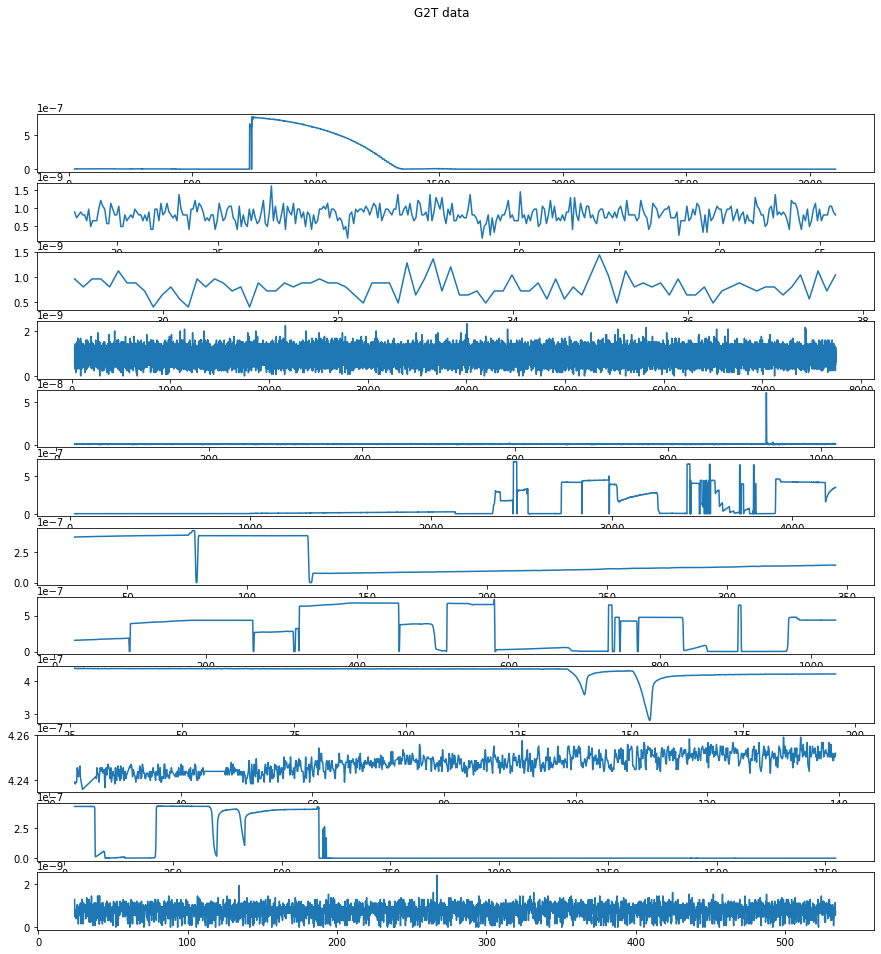

In [95]:
fig, axs = plt.subplots(len(files_tdms))
fig.suptitle('G2T data')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(files_tdms)):
    axs[i].plot(time_data_lst_1[i], G2t_data_lst_1[i])

In [120]:
px.line(x=time_data_lst_1[-2], y=G2t_data_lst_1[-2])

In [124]:
G2t_data_writing= G2t_data_lst_1[-2]
time_data_writing= time_data_lst_1[-2]

In [171]:
second_minimum, peak, first_minimum

(1.0653718e-07, 3.532506e-07, 3.5805176e-08)

In [172]:
time_start_record_1, time_end_record_1, second_minimum_time, first_minimum_time

(585.81555, 333.1043, 414.60846, 347.9048)

In [113]:
import plotly.express as px

In [117]:
index = 0
time_data_slice = []
tip_V_slice = []
G2t_data_slice = []
file_index = -1
for time in time_data_lst[file_index]:
    
    if (time > 2700) & (time < 2850):
        time_data_slice.append(time)
        #tip_V_slice.append(tip_V_lst[file_index][index])
        G2t_data_slice.append(G2t_data_lst[file_index][index])
        
    index += 1

In [118]:
px.line(x = time_data_slice, y = G2t_data_slice)

In [111]:
index = 0
time_data_slice = []
tip_V_slice = []
G2t_data_slice = []
file_index = -2
for time in time_data_lst_1[file_index]:
    
    if (time > 300) & (time < 450):
        time_data_slice.append(time)
        #tip_V_slice.append(tip_V_lst[file_index][index])
        G2t_data_slice.append(G2t_data_lst_1[file_index][index])
        
    index += 1

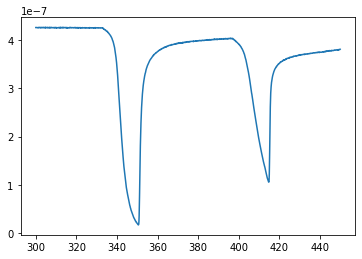

In [112]:
plt.plot(time_data_slice, G2t_data_slice)

In [79]:
path = folder + '/20160429/SA02821.006515.tdms'

In [6]:
tdms_file = TdmsFile(path)

In [12]:
#tdms_file_object = tdms_file.object()

tdms_file is similar to json. It contains groups. Each group has different channels to record data

In [7]:
#Get groups existing in the tdms file
tdms_file.groups()

['contact data', 'conductance data']

In [23]:
#Ger channels in each group
tdms_file.group_channels('contact data'), tdms_file.group_channels('conductance data')

([<TdmsObject with path /'contact data'/'time'>,
  <TdmsObject with path /'contact data'/'z position'>,
  <TdmsObject with path /'contact data'/'x position'>,
  <TdmsObject with path /'contact data'/'y position'>,
  <TdmsObject with path /'contact data'/'deflection'>,
  <TdmsObject with path /'contact data'/'tip voltage'>],
 [<TdmsObject with path /'conductance data'/'2tG'>,
  <TdmsObject with path /'conductance data'/'4tG'>])

In [ ]:
# Will work on later
def tdms_read(tdms_file):
    
    return 

In [29]:
# Procedure to get G2t data. Details can be found in online manual
t2_G = tdms_file.object('conductance data', '2tG')
t2_G_data = t2_G.data

In [46]:
deflection = tdms_file.object('contact data', 'deflection')
deflection_data = deflection.data

In [48]:
z_pos = tdms_file.object('contact data', 'z position')
z_pos_data = z_pos.data

In [50]:
tip_V = tdms_file.object('contact data', 'tip voltage')
tip_V_data = tip_V.data

In [33]:
len(t2_G_data)

30786

In [36]:
time = tdms_file.object('contact data', 'time')

In [39]:
time_data = time.data
time_data

array([  24.375437,   24.475447,   24.575457, ..., 3104.6064  ,
       3104.7065  , 3104.8064  ], dtype=float32)

In [38]:
len(time.data)

30786

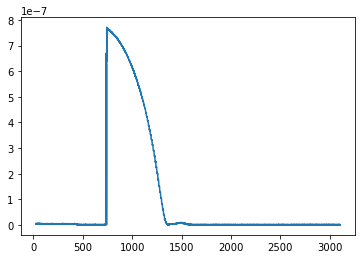

In [44]:
plt.plot(time_data, t2_G_data)

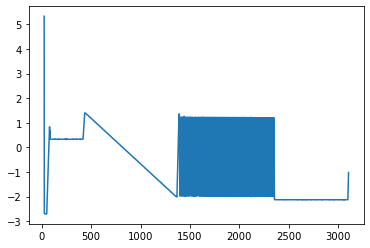

In [47]:
plt.plot(time_data, deflection_data)

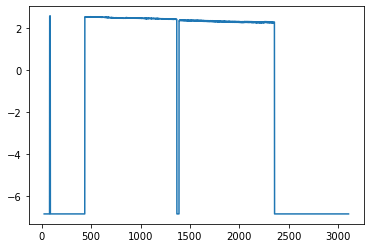

In [49]:
plt.plot(time_data, z_pos_data)

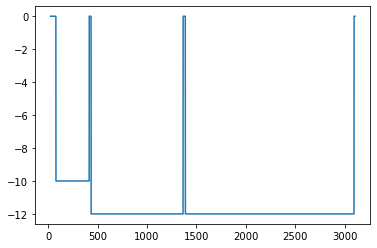

In [52]:
plt.plot(time_data, tip_V_data)